# 探索型データ分析
Kaggleで取得したサンプルデータを利用しPythonライブラリによるデータ操作の基本を学ぶ。  
データ内容を整理、視覚化しモデル学習を行うための準備をする。

参考:Kaggle Walmart Recruiting - Store Sales Forecasting https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data?select=train.csv.zip

In [58]:
# データ分析に必要なライブラリを読み込む
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# font設定
import japanize_matplotlib 
sns.set(font='IPAexGothic')
matplotlib.rcParams["font.family"] = "IPAexGothic"

In [59]:
features = pd.read_csv("/workspace/WalmartRecruiting/features.csv")
stores = pd.read_csv("/workspace/WalmartRecruiting/stores.csv")
df_test = pd.read_csv("/workspace/WalmartRecruiting/test.csv")
df_train = pd.read_csv("/workspace/WalmartRecruiting/train.csv")
submit = pd.read_csv("/workspace/WalmartRecruiting/sampleSubmission.csv")

## Stores
45店舗に関する情報が含まれており、店舗の種類と規模が表示されている

In [60]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


## TrainとTest

- Store 店舗番号
- Dept  部門カテゴリ
- Date 日付
- Weekly_Sales 指定された店舗の指定された部門の売上高
- IsHoliday その週が休日週かどうか

In [61]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


- 日付  
Train：2010-02-05 ～ 2012-10-26  
Test： 2012-11-02 ～ 2013-07-26

In [62]:
print(df_train["Date"].max())
print(df_train["Date"].min())
print(df_test["Date"].max())
print(df_test["Date"].min())

2012-10-26
2010-02-05
2013-07-26
2012-11-02


- Store 店舗番号は1から45の45店舗分

In [63]:
print(df_test["Store"].nunique())
print(df_test["Store"].unique())

45
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


- Dept 部門カテゴリは1から99まであるがデータ上は81カテゴリとなっている

In [64]:
print(df_test["Dept"].min())
print(df_test["Dept"].max())
print(df_test["Dept"].nunique())
print(df_test["Dept"].unique())

1
99
81
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 52 54
 55 56 58 59 60 67 71 72 74 79 80 81 82 83 85 87 90 91 92 93 94 95 96 97
 98 99 77 39 50 43 51 78 65]


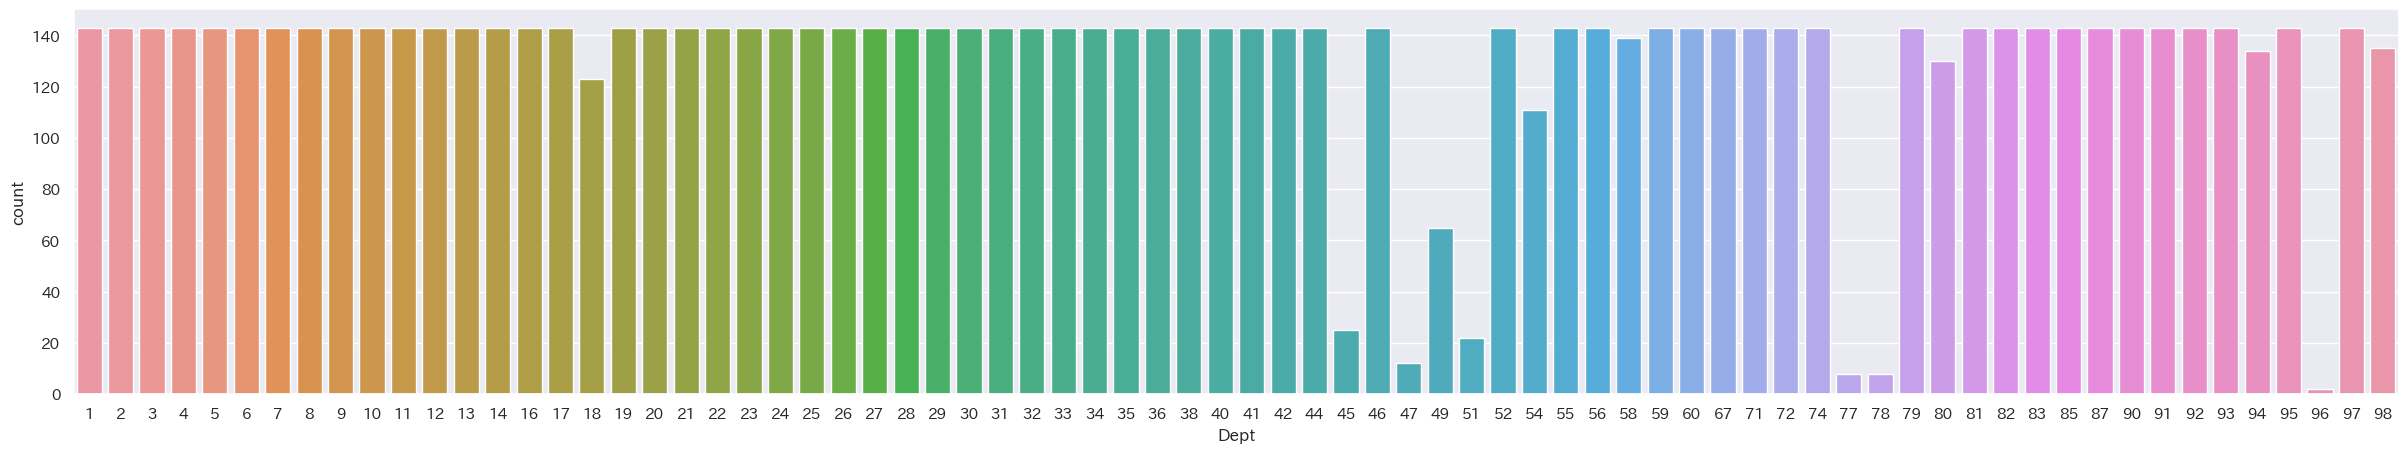

In [65]:
plt.figure(figsize=(30,5))
sns.countplot(x="Dept", data=df_train[df_train["Store"] == 45])
plt.show()

In [68]:
pd.pivot_table(df_train[df_train["Dept"] == 45], index="Store", columns="Date", values="Weekly_Sales")

Date,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,...,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26
Store,,,,,,,,,,,,,,,,,,,,,
1,37.44,34.47,22.94,45.41,74.35,29.97,8.50,10.00,13.50,35.97,...,NaN,NaN,10.47,NaN,52.35,20.94,NaN,10.47,NaN,20.94
2,27.50,20.50,42.25,164.50,32.50,158.00,26.00,19.50,52.00,-118.00,...,NaN,5.97,NaN,NaN,NaN,20.94,NaN,10.47,NaN,NaN
3,4.50,NaN,4.00,NaN,NaN,4.50,8.50,NaN,4.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.50,2.50,NaN,14.97,NaN,NaN,5.96,13.43,NaN,2.96,...,10.47,NaN,10.47,NaN,10.47,NaN,NaN,NaN,NaN,10.47
5,NaN,NaN,NaN,10.96,26.88,1.51,3.36,NaN,4.96,9.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24.62,42.00,14.06,10.00,47.00,101.00,70.00,74.00,32.00,79.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.00,23.78,21.54,14.54,22.81,36.02,3.00,NaN,NaN,19.06,...,5.97,NaN,107.46,8.97,NaN,8.97,NaN,NaN,35.82,NaN
8,NaN,2.50,NaN,NaN,4.00,2.50,NaN,NaN,NaN,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,7.50,7.50,5.50,2.00,NaN,NaN,NaN,2.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
